<div style="border:solid green 2px; padding: 20px">
<b>Привет, Юлия  !</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

**Описание данных**  

*Признаки:*
- RowNumber — индекс строки в данных;
- CustomerId — уникальный идентификатор клиента;
- Surname — фамилия;
- CreditScore — кредитный рейтинг;
- Geography — страна проживания;
- Gender — пол;
- Age — возраст;
- Tenure — сколько лет человек является клиентом банка;
- Balance — баланс на счёте;
- NumOfProducts — количество продуктов банка, используемых клиентом;
- HasCrCard — наличие кредитной карты;
- IsActiveMember — активность клиента;
- EstimatedSalary — предполагаемая зарплата;  

*Целевой признак:*
- Exited — факт ухода клиента.

Подготовим данные к анализу, для этого импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В колонке Tenure, очевидно, имеются пропуски, которые необходимо заполнить.

Чтобы оценить возможность заполнения данного столбца с помощью регрессии, необходимо посмотреть есть ли взаимосвязь между остальными принаками и Tenure.

In [4]:
corr_matrix = data.corr()
corr_matrix['Tenure']

RowNumber         -0.007322
CustomerId        -0.021418
CreditScore       -0.000062
Age               -0.013134
Tenure             1.000000
Balance           -0.007911
NumOfProducts      0.011979
HasCrCard          0.027232
IsActiveMember    -0.032178
EstimatedSalary    0.010520
Exited            -0.016761
Name: Tenure, dtype: float64

Коэффициенты корреляции очень малы, что указывает на отсутсвие взаимосвязи осталтных признаков на исследуемый столбец, следовательно, корректнее всего заполнить пропуски в этом столбце с помощью медианы значений.

In [5]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Угу, все верно!</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Посмотрим на первые 5 строк датасета.

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


В датасете присутсвуют два интересующих нас категориальных признаков, которые необходимо закодировать с помощью OHE кодирования для дальнейших расчетов. Посмотрим какие уникальные значения встречаются в этих столбцах.

In [8]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Для дальнейшего прогнозирования целевого признака Exited не нужны столбцы CustomerId и Surname, т.к. фамилия и уникальный идентификатор пользователя нужны для аналитики и поиска клиентов в базе данных, а не для расчета регрессии. Удалим эти колонки из датасета. А так же не нужна колонка RowNumber.

In [10]:
data = data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, отлично, они действительно не нужны:)</div>

Изучим корреляции в данных. Так мы можем оценить взаимосвязи в данных и влияние параметров на целевой признак.

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


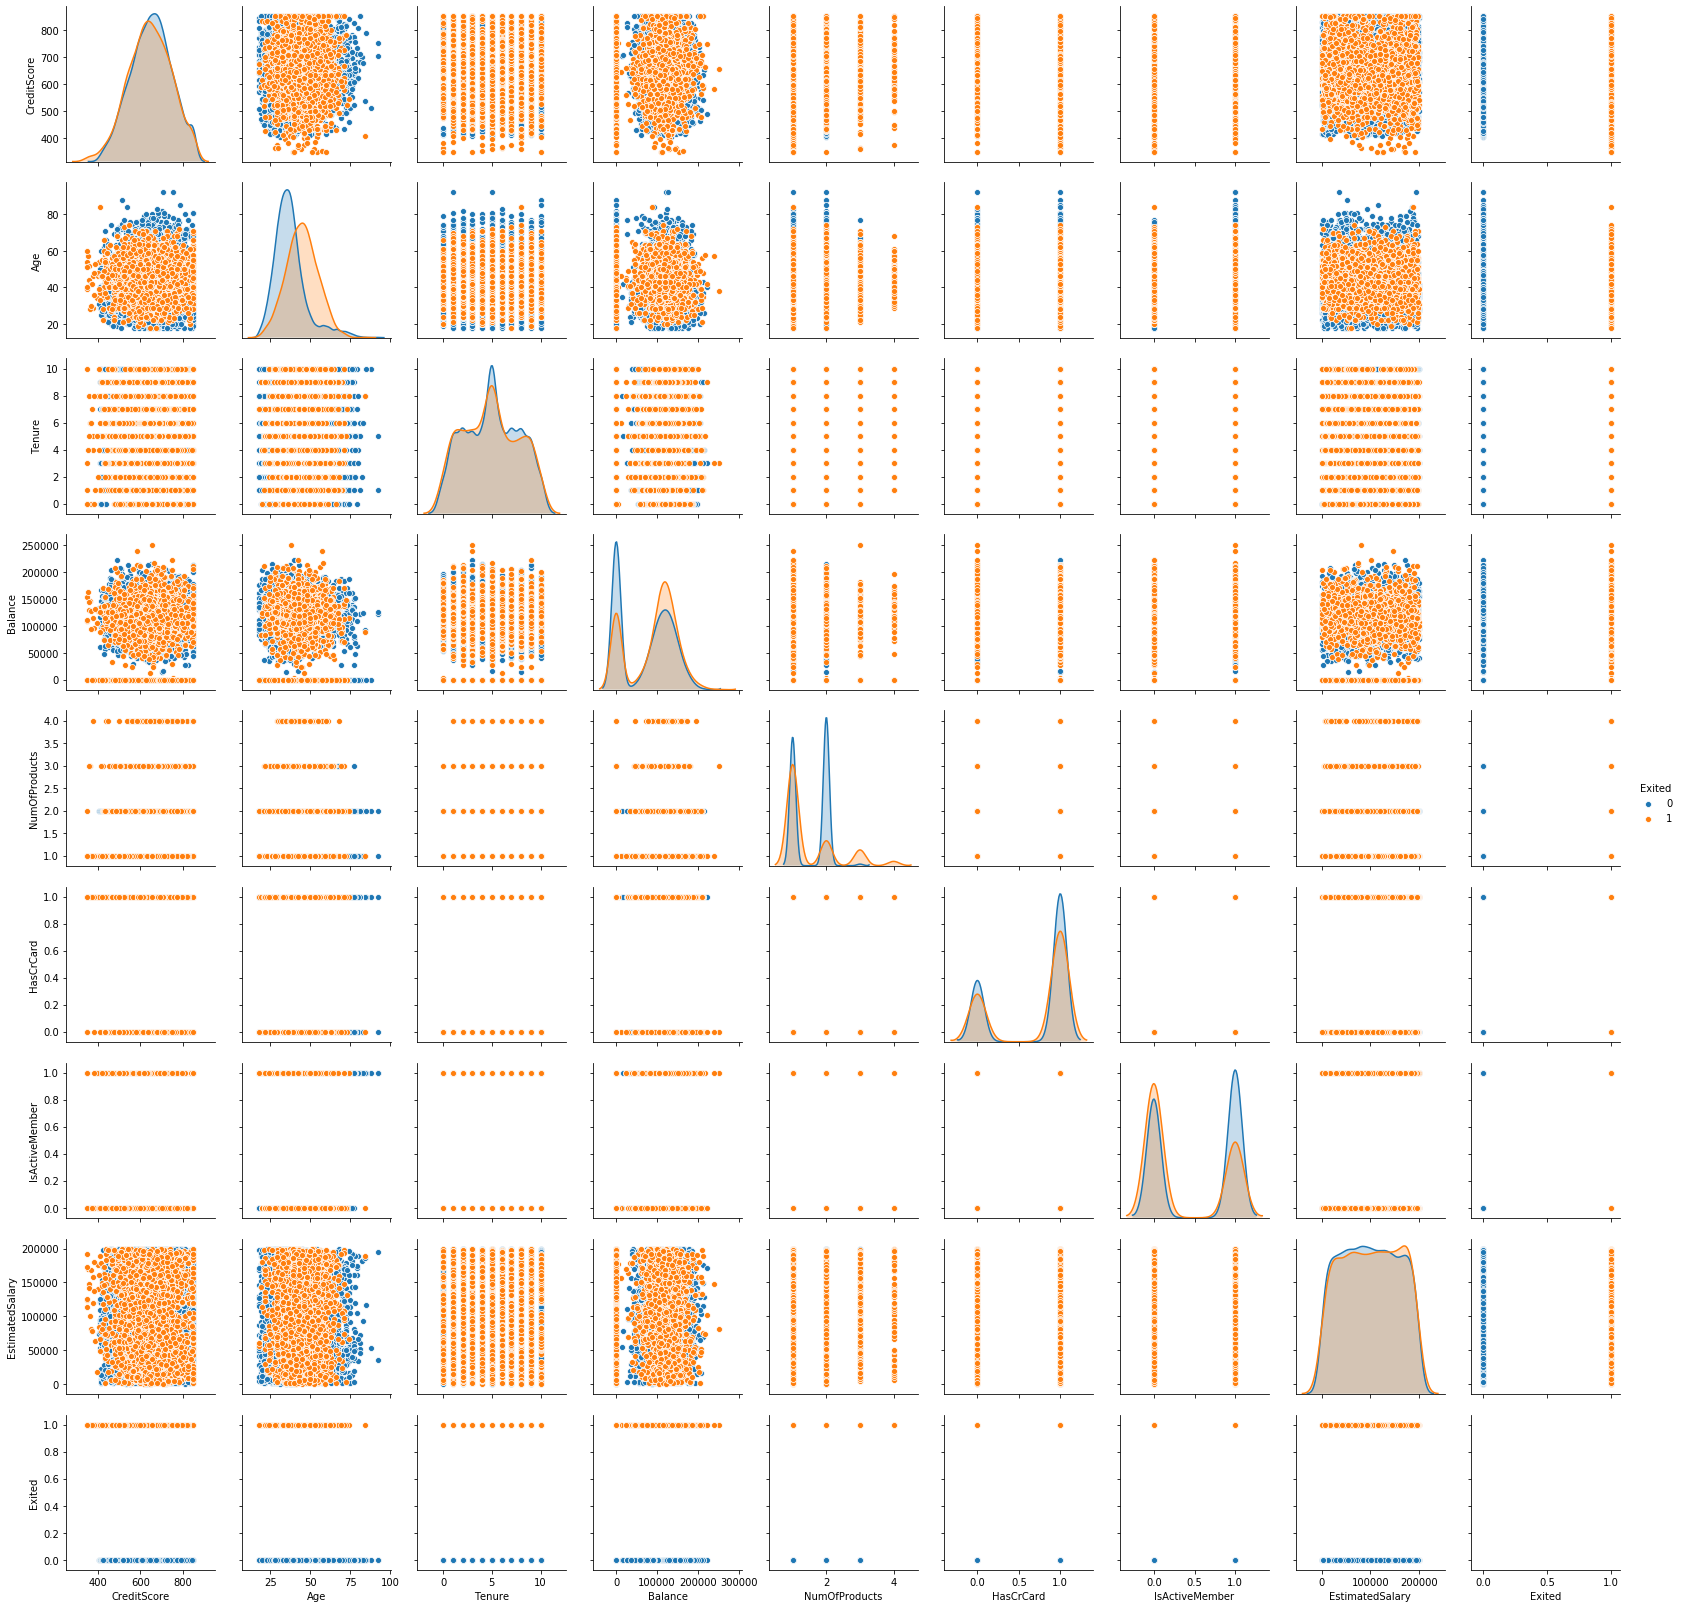

In [11]:
sns.pairplot(data, hue="Exited")


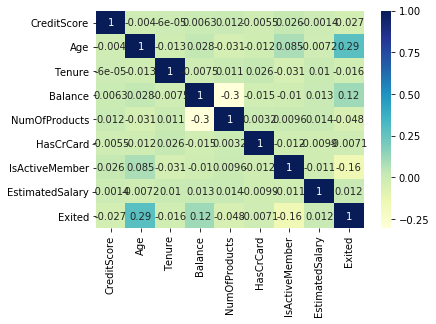

In [12]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu");

Как показало исследование, значмиельной корреляции между признаками нет, а значит набор данных чист и его можно использовать для машинного обучения.

Закодируем категориальные переменные Surname и Geography.

In [13]:
data_ohe = pd.get_dummies(data, drop_first=True)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Верно!<br>
    
А ты знаешь для чего: `drop_first=True`<br>
Статья: https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde</div>

In [14]:
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Определим целевой признак и признаки.

In [15]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

Разобьем итоговый датасет на три выборки: обучающая, валидационная и тестовая.

In [16]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [17]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

In [18]:
print('Размер обучающей выборки:', features_train.shape, target_train.shape)
print('Размер валидационной выборки:', features_valid.shape, target_valid.shape)
print('Размер тестовой выборки выборки:', features_test.shape, target_test.shape)

Размер обучающей выборки: (6000, 11) (6000,)
Размер валидационной выборки: (2000, 11) (2000,)
Размер тестовой выборки выборки: (2000, 11) (2000,)


Отмасштабируем признаки на обучающей и валидационной выборках.

In [20]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [21]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head()
pd.options.mode.chained_assignment = None

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Отлично. Верно Масштабируешь признаки:)

P.S 
Можешь использовать `pd.options.mode.chained_assignment = None`, чтобы не выскакивали такие ошибки</div>

Прямой вид кодирования категориальных переменных применим только для логистической регресси,а она, возможно, не лучшая для решения поставленной задачи. 
Поэтому создадим еще один датасет для исследований c помощью порядкового кодирования.

In [22]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)

Разобъем полученный датасет на три выборки: обучающую, валидационную и тестовую.

In [23]:
target = data_ordinal['Exited']
features = data_ordinal.drop('Exited', axis=1)

In [24]:
features_train_o, features_valid_test_o, target_train_o, target_valid_test_o = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [25]:
features_valid_o, features_test_o, target_valid_o, target_test_o = train_test_split(
    features_valid_test_o, target_valid_test_o, test_size=0.5, random_state=12345)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Хорошо, принято!!!</div>

In [26]:
print('Размер обучающей выборки:', features_train_o.shape, target_train_o.shape)
print('Размер валидационной выборки:', features_valid_o.shape, target_valid_o.shape)
print('Размер тестовой выборки выборки:', features_test_o.shape, target_test_o.shape)

Размер обучающей выборки: (6000, 10) (6000,)
Размер валидационной выборки: (2000, 10) (2000,)
Размер тестовой выборки выборки: (2000, 10) (2000,)


Отмасштабируем признаки на обучающей и валидационной выборках.

In [27]:
scaler = StandardScaler()
scaler.fit(features_train_o[numeric])
features_train_o[numeric] = scaler.transform(features_train_o[numeric])
features_valid_o[numeric] = scaler.transform(features_valid_o[numeric])
features_test_o[numeric] = scaler.transform(features_test_o[numeric])

features_train_o.head()
pd.options.mode.chained_assignment = None

Исходная база данных была обработана от пропусков значений, были удраны лишние столбцы, а оставштиеся признаки отмасштабированы.  
Изучая данные мы выяснили, что сильной корреляции между признаками нет и их все можно включить в модель.  
По итогам работ, проведенных в данном пункте, мы получили два набора данных: с помощью прямого кодирования и последующего разбития на три выборки и, аналогично, с помощью порядкового кодирования.

## Исследование задачи

Обучим модель логистической регресии.

In [28]:
model = LogisticRegression(random_state=12345, solver='liblinear') 
model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

Оценим качество полученной модели на валидационной выборке

In [29]:
predicted_valid = model.predict(features_valid)

print(f1_score(target_valid, predicted_valid))

0.33108108108108103


Показатель f1 меры достаточно низкий, а значит прогноз не удался.

Обучим модель дерева решений.

In [30]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train_o, target_train_o)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

Проверим модель дерева решений на валидационной выборке.

In [31]:
predicted_valid_o = model.predict(features_valid_o)

print(f1_score(target_valid_o, predicted_valid_o))

0.45929526123936815


Показатель f1 уже увеличился, но все еще не удовлетворительно.  
Рассмотрим модель случайного леса.

In [32]:
model = RandomForestClassifier(random_state=12345, n_estimators=3)
model.fit(features_train_o, target_train_o)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

Проверим модель случайного леса на валидационной выборке.

In [33]:
predicted_valid_o = model.predict(features_valid_o)

print(f1_score(target_valid_o, predicted_valid_o))

0.5186170212765957


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Можно было бы методом подбора, подобрать нужные параметры модели и тем самым улучшить метрику</div>

Очевидно, что модель случайного леса выигрышнее, даже при количестве деревьев равному 3. Но показатель f1 можно и нужно улучшить. Следовательно, необходимо изучить баланс классов и отмасштабировать данные для дальнешего прогноза и увеличения качества модели.

**Посмотрим на баланс классов в нашем целевом признаке**

In [34]:
data['Exited'].value_counts()/len(data['Exited'])

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Оценим качество фиктивной модели, которая будет предсказывать одно число (наибольший класс). Для этого воспользуемся инструментом DummyClassifier.

In [35]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train_o, target_train_o)
DummyClassifier(strategy='most_frequent')
predict = dummy_clf.predict(features_valid_o)
dummy_clf.score(predict, target_valid_o)


0.791

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Молодец, что смотришь на const модель:)</div>

Очевидно, что нам необходимо уравновесить классы.

Тестирование трех видов моделей: логистическая регрессия, дерево решений и случайный лес, показало, что на сырых данных самая эффективная модель - модель случайного леса. Ее мы и будем использовать для дальнейшего прогнозирования.  
Однако f1 меру можно и нужно улучшить для данной модели. 
Проверка показала, что в данных обнаружен дисбаланс классов в целевом признаке. 

## Борьба с дисбалансом

Продублируем объекты положительного класса и объединим их с объектами отрицательного класса.

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Определим разницу между положительным и отрицательным классом.

In [37]:
features_zeros = features_train_o[target_train_o == 0]
features_ones = features_train_o[target_train_o == 1]
target_zeros = target_train[target_train_o == 0]
target_ones = target_train[target_train_o == 1]

In [38]:
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4804, 10)
(1196, 10)
(4804,)
(1196,)


In [39]:
print('Положительные объекты нужно увеличить на:', len(features_zeros) - len(features_ones))

Положительные объекты нужно увеличить на: 3608


In [41]:
features_upsampled, target_upsampled = upsample(features_train_o, target_train_o, 3)


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>В самой функции уже есть shuffle:)</div>

In [42]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(8392, 10)
(8392,)


**Для ревью**  
*Привет! Поправь меня пожалуйста, если я не так поняла задание.  
Мы должны были на сырых данных посмотреть разные модели и выбрать ту, с которой будем дальше работать. В моем случае это модель случайного леса. Потому что тестировать и дальше все три рассмотренные модели не имеет смысла, а нужно просто улучшить показатели лучшей модели. Поэтому гиперпараметры я буду искать для модели случайного леса.*

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>В идеале можно было по подбирать параметры для всех моделей и посмотреть какая же лучшая.Обучать на train и смотреть оценку на valid.</div>

На "сырых" данных лучше всего себя проявила модель случайного леса.  
Определим гиперпараметры модели.

**Для ревью**  
*Я пыталась подобрать гиперпараметры с помощью GridSearchCv, но мой компьютер (у меня xiaomi) почему то оооооочень долго перебирал и так и не предоставил результат. С чем это может быть связано? В предыдущем проекте я именно так выбрала гиперпараметры*

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>Можешь попробовать Google Colab, поставь на ночь к утру должно все обучиться:) Возможно ты перебирала много параметров + возможно проблема с мощностью устройства </div>

In [43]:
best_result = 0
best_depth = 0

In [44]:
for depth in range(1, 16, 1):
    model = RandomForestClassifier(n_estimators=60, max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid_o)
    result = f1_score(target_valid_o, predicted_valid)
    if result > best_result:
        best_result = result
        best_depth = depth
print(best_result, best_depth)

0.6314553990610329 6


Мы нашли оптимальную глубину дерева, теперь будем изменять количество деревьев.

In [45]:
best_result = 0
best_est = 0

In [47]:
for est in range(60, 100, 2):
    model = RandomForestClassifier(n_estimators= est, max_depth=6, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid_o)
    result = f1_score(target_valid_o, predicted_valid)
    if result > best_result:
        best_result = result
        best_est = est
print(best_result, best_est)

0.6344827586206896 82


<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>Отлично, все верно:)</div>

Итоговая модель имеет следующие параметры: RandomForestClassifier(n_estimators= 82, max_depth=6, random_state=12345)

В ходе работы над данным пунктом мы увеличили положительный класс на обучающей и валидационной выборках, чтобы сбалансировать классы и добиться лучших показателей модели.

## Тестирование модели

Обучим лучшую модель на обучающей выборке, которую сбалансировали в 3 пункте работы.

In [48]:
model = RandomForestClassifier(n_estimators= est, max_depth=6, random_state=12345)

In [49]:
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=98,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Это очень спорный момент...хм. Такс, смотри я погоречился, что выделил красным ячейку. На самом деле это не прям ошибка, а можно сказать, что рекомендация была:

+  https://datascience.stackexchange.com/questions/55374/is-it-correct-to-join-training-and-validation-set-before-inferring-on-test-set 

Переделай, пожалуйста, на:
+  Если очешь соединить train+valid, то соедини изначально оригиналы (feature_train и feature_valid),а потом сбалансируй выборки. И после этого обучай на лучшей модели.
+  Либо просто обучи train сбалансированный на лучшей модели.
+  Не стоит соединять сбалансированный train и valid(который не сбалансированный)

</div>

Так же проверим f1 меру на тестовой выборке

<div class="alert alert-danger">
<b>Комментарий ревьюера V2❌:</b> Я сначала не придал этому значения. Смотри я правильно понимаю, ты создаешь две разные группы выборок. Одну для логистической регрессии, а вторую для всего остального. Этого делать не стоило:( потому что как понимаю, мы с тобой запутались. Смотри у нас логистическая регрессия показала плохие результаты. И в номинации лучшая модель победила: RandomForestClassifier. А значит, нам необходимо использовать немного другую группы выборок. Как я понимаю features_test. Перепровь и исправь, пожалуйста.</div>

*Я закодировала прямым кодированием данные для логистической регрессии (feature_train, feature_valid, feature_test, target_train, target_valid, target_test), а для дерева и случайного леса я использовала порядковое кодирование и получила следующие выборки: feature_train_o, feature_valid_o, feature_test_o, target_train_o, target_valid_o, target_test_o.  
Скажи, я не правильно поняла этот пункт? Просто в тренажере говорили что прямое кодирование применяется только для логистической регрессии, а порядковое для дерева и случайного леса, поэтому я так разбила данные.
Эти выборки я отмасштабтровала в 1 пункте.  
Баланс классов я делала для обучающей выборки.*

<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b>Да, прости, я чет сам запутался в твоих переменных и тебя еще пытался запутать. Тысяча извинений - ты все верно сделала. </div>

In [50]:
features_test_o.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7041,-2.229735,0.0,1.0,-0.088417,-1.101690,-0.956910,1.0,1.0,0.0,0.653569
5709,-0.087689,0.0,0.0,0.006536,1.446272,-0.956910,0.0,1.0,0.0,-1.646896
7117,-0.919551,2.0,1.0,-0.753089,-0.009707,0.611746,0.0,1.0,1.0,-1.366368
7775,-0.254061,2.0,1.0,0.101489,1.810266,-0.956910,1.0,1.0,0.0,0.082852
8735,0.785767,0.0,1.0,-0.848042,1.810266,0.347398,0.0,0.0,1.0,-1.074799


<div class="alert alert-danger">
<b>Комментарий ревьюера V2❌:</b> Нам необходимо обучить сначала StandardScaler на train. В ячейке 66 вставь, пожалуйста, еще и вот этот код:</div>

In [ ]:
#КОД РЕВЬЮЕРА
features_test[numeric] = scaler.transform(features_test[numeric])

In [51]:
predicted_test = model.predict(features_test_o)

print(f1_score(target_test_o, predicted_test))

0.5962441314553991


Построим AUC-ROC кривую и исследуем ее.

In [52]:
probabilities_test = model.predict_proba(features_test_o)
probabilities_one_test = probabilities_test[:, 1]

In [53]:
fpr, tpr, thresholds = roc_curve(target_test_o, probabilities_one_test)

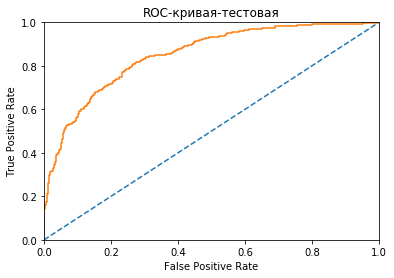

In [54]:
plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая-тестовая")
plt.show()

In [55]:
auc_roc = roc_auc_score(target_test_o, probabilities_one_test)
print(auc_roc)

0.8501179034915324


Показатель f1 меры итоговой модели равен 0.63 на обучающей выборке и 0.59 на тестовой выборке.  
Как видно из графика, мы получили модель высокой точности. Площадь под графиком нашей модели равна 0.85

<div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b>Да, трудно:) Не переживай, все получится и справимся. Не стесняйся, задавай вопросы если есть. Если смущает красный цвет, исправь все, перепроверь и удали мои комментарии. Я в след раз заново полностью с нуля перепроверю;) А то они уже даже меня раздражают.

Только перепроверь все: Выборки, StandardScaler(следует сразу после обучения на train применить transform к valid и test)

P.S и используй: Можешь использовать `pd.options.mode.chained_assignment = None`, чтобы не выскакивали ошибки</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

В ходе данного исследования мы добились поставленной цели: показатель F1-меры для тестовой выборки равен 0.59.  
Для этого была проведена предобработка данных, заполнены все пропуски значений, убрали ненужные столбци в датасете.  
Данные отмасштабировали, категориальные переменные закодировали двумя способами (прямым и порядковым кодированием).  
На сырых данных лучше всего себя проявила модель случайного леса, ее мы и оставили для дальнейшего прогноза.  
Подбор гиперпараметров определил наилучшую модель, для которой и была подсчитана F1-мера, а так же простроены графики AUC-ROC кривой, который показал наглядно, что полученная модель хорошего качетва.

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Юлия, спасибо за проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>


<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b>Юлия, прости еще раз, я все перепутал:(
    
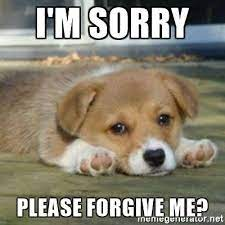
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V3✔️:</b>Удачи в следующих проектах!!!
    
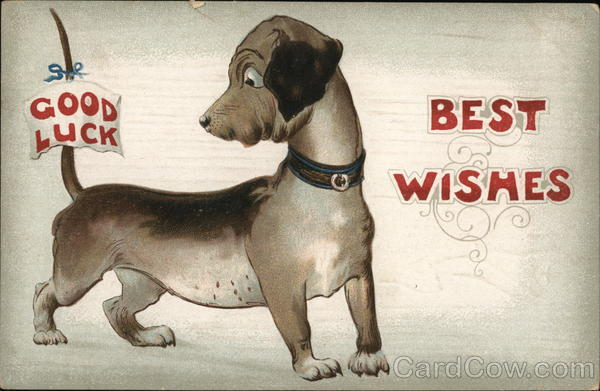    
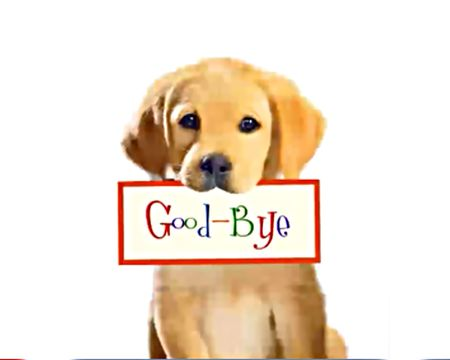    
</div>